In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spaceship_titanic_dataset = pd.read_csv('train.csv')
print(f"La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : {spaceship_titanic_dataset.shape}")

La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : (8693, 14)


In [3]:
###Suppression des colonnes non importantes pour nos données d'entraînement
spaceship_titanic_train = spaceship_titanic_dataset.drop(['PassengerId', 'Name'], axis=1)
spaceship_titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Gestion des valeurs manquantes

In [4]:
#moyenne des valeurs manquantes dans chaque variable
spaceship_titanic_dataset.isnull().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

### Première methode pour gerer les valeurs manquantes
##### Processus : Nous allons sélectionner aléatoirement des valeurs pour chaque variable du dataset afin de remplacer les valeurs manquantes, ainsi nous ne perdrons pas nos données.

In [5]:
def remplacer_valeurs_manquantes(dataset):
    random_values_dict = {}
    new_dataset = dataset.copy()
    
    for var in new_dataset.columns:
        non_missing_values = new_dataset[var].dropna()
        random_values = non_missing_values.sample(new_dataset[var].isnull().sum(), replace=True, random_state=0)
        random_values_dict[var] = random_values
        
        new_dataset[var].fillna(random_values, inplace=True)
        
    return new_dataset

In [6]:
resultat = remplacer_valeurs_manquantes(spaceship_titanic_train)
resultat.isnull().sum().sort_values(ascending= True)

Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

### Deuxième methode pour gérer les valeurs manquantes 
#### Processus : Remplacer les valeurs manquantes par le mode pour les variables et visualiser la distribution de la variable ensuite.

In [7]:
def missing_values_mode(dataset):
    new_dataset = dataset.copy()
      
    for var in new_dataset.columns:
        if new_dataset[var].isnull().sum() > 0:
            mode_value = new_dataset[var].mode()[0]  
            new_var_name = var + '_filled'  
            new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)  
            
    return new_dataset
    

In [8]:
resultat_values_mode = missing_values_mode(spaceship_titanic_train)
resultat_values_mode.isnull().sum().sort_values(ascending= True)

Transported              0
ShoppingMall_filled      0
FoodCourt_filled         0
RoomService_filled       0
VIP_filled               0
Age_filled               0
Destination_filled       0
Cabin_filled             0
CryoSleep_filled         0
HomePlanet_filled        0
Spa_filled               0
VRDeck_filled            0
Age                    179
RoomService            181
Destination            182
Spa                    183
FoodCourt              183
VRDeck                 188
Cabin                  199
HomePlanet             201
VIP                    203
ShoppingMall           208
CryoSleep              217
dtype: int64

In [22]:

def distribution_numeric_values_mode(dataset):
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    rows = len(numeric_columns)
    cols = 1  # Une seule colonne pour chaque variable (superposition)

    fig, axes = plt.subplots(rows, cols, figsize=(8, 6*rows))
    plt.subplots_adjust(hspace=0.5)

    for i, var in enumerate(numeric_columns):
        ax = axes[i]  # Tracé de la variable
        mode_value = dataset[var].mode()[0]  # Calculer le mode de la variable
        var_filled = var + '_filled'

        # Tracer la distribution de la variable d'origine et de la variable remplie
        dataset[var].plot(kind='kde', ax=ax, label=f"{var} original", color='blue')
        dataset[var_filled] = dataset[var].fillna(mode_value)
        dataset[var_filled].plot(kind='kde', ax=ax, label=f"{var} rempli (mode)", color='red')

        ax.set_title(f"Distribution de {var}")
        ax.legend()
        ax.set_xlim(dataset[var].min(), dataset[var].max())
        ax.set_ylim(0, None)  # Définition de la limite inférieure de l'axe y à 0

    plt.show()

def distribution_categorical_values_mode(dataset):
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    for var in categorical_columns:
        mode_value = dataset[var].mode()[0]  # Calculer le mode de la variable
        dataset[var].fillna(mode_value, inplace=True)  # Remplacer les valeurs manquantes par le mode

        # Afficher la distribution de la variable après remplacement des valeurs manquantes par le mode
        plt.figure(figsize=(8, 6))
        dataset[var].value_counts(normalize=True).plot(kind='bar', color='blue')
        plt.title(f"Distribution de {var}")
        plt.xlabel(var)
        plt.ylabel("Fréquence")
        plt.show()

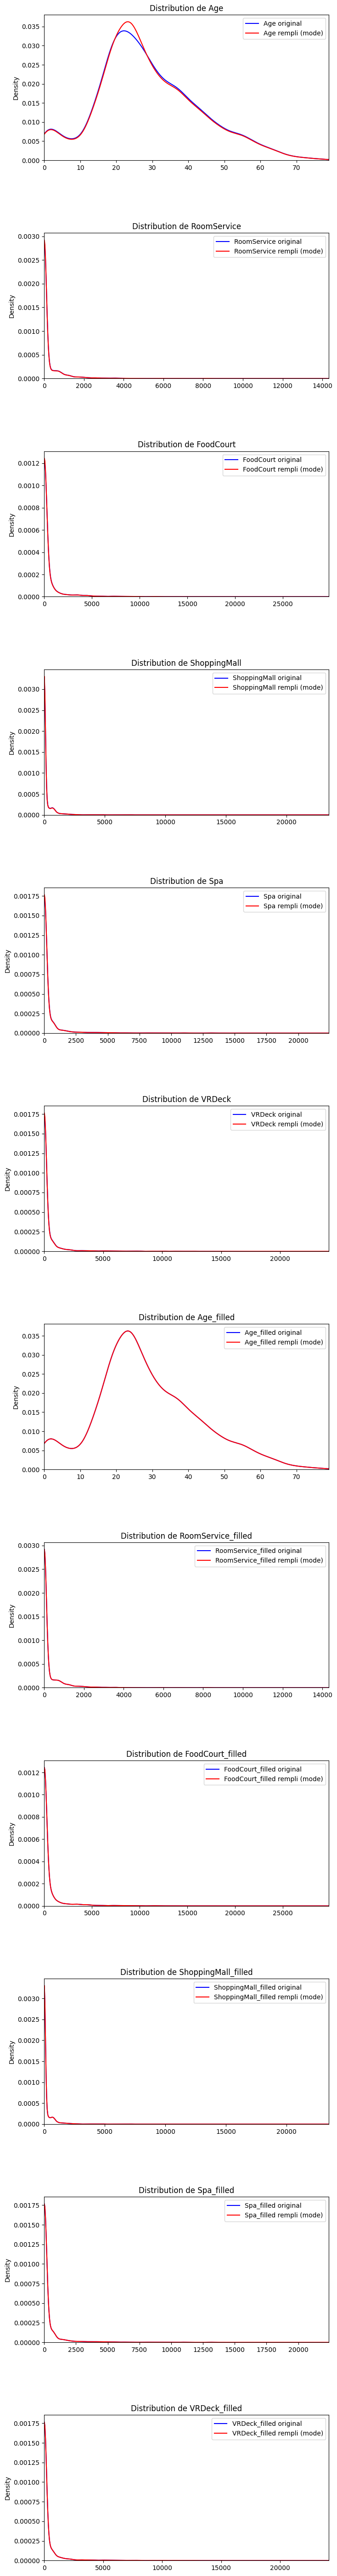

In [23]:
distribution_numeric_values_mode(resultat_values_mode)

In [25]:
# distribution_categorical_values_mode(resultat_values_mode)

Conclusion de cette étape: Vu que la distribution des variables avec le remplacement des valeurs manquantes par le mode ne semble pas changer on peut alors on peut conclure que c'est une bonne methode et qu'on peut utiliser les variables de ce dataset pour effectuer nos analyses

In [34]:
spaceship_titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
###Suppression des colonnes non importantes pour nos données d'entraînement
resultat_values_mode = resultat_values_mode.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ], axis=1)
resultat_values_mode.head()

KeyError: "['HomePlanet'] not found in axis"

## Gestion des valeurs aberantes 

In [27]:
def plot_boxplot_all(dataset):
    plt.figure(figsize=(12, 8))
    dataset.boxplot(vert=False)
    plt.title("Boxplots des variables quantitatives")
    plt.xlabel("Valeurs")
    plt.ylabel("Variables")
    plt.show()

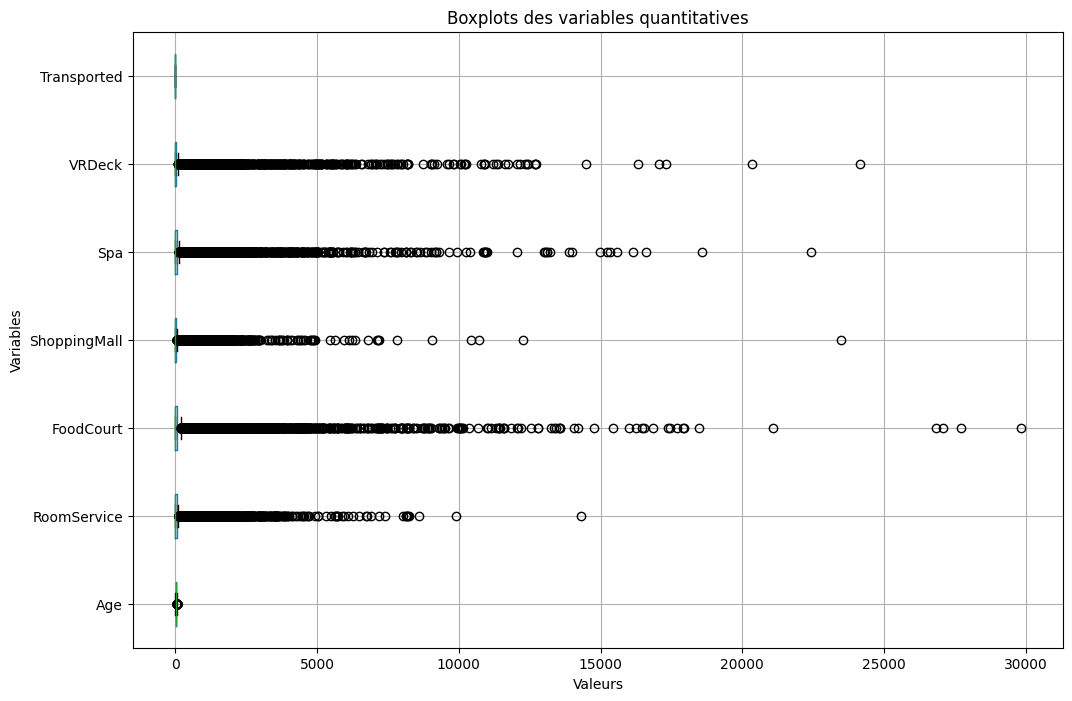

In [29]:
plot_boxplot_all(spaceship_titanic_train)